## Project Team ID: PTID-CDS-SEP-23-1644
## Batch: May 15 - CDS
## Project: PRCP-1004-Fifa20

## Business Case: create a clustering model for fifa20 using the previous datas from the last 6 version of videogame

## Problem Statement

### Tasks

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:- Explore football skills and cluster football players based on their attributes.

### Task3:- Explore the data and attempt all the below asked questions in a
### step by step manner:
     ●  Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


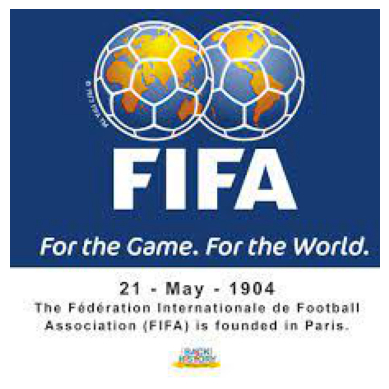

In [2]:
img=plt.imread('images.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### READ DATA

In [3]:
data=pd.read_csv('players_20.csv')

In [4]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


## Domain Analysis

### Brief on each Attribute
- 1. **Name, Age and Height**: these attributes are specific to each  player.  
- 2. **Overall**: (rated 1-99) this is the overall/general performance and value of the player. (this attribute may be used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature.)
- 3. **Potential**:(rated 1-99) this is the Maximum Overall rating expected to be reached by a player in the top of his career
- 4. **PreferredFoot**: (0- left, 1-right foot< label encoded) preference towards Right or Left foot. 
- 5. **WeakFoot**:(left for righties rated between 1 to 5) describes How well a player uses his weak foot 
- 6. **WorkRate**: (0 for low, 0.5 for medium and 1 for high < label encoded) this expresses the Degree of the effort the player puts in terms of attack and defense. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate.
- 7. **Position**:(positions rated between 1-99) Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and FIFA 19 can be grouped as:
     ***Strikers***-  they are positioned in front of forwards and wingers and very closed to the opposing goal. their ball control, shooting and finishing skills are expected to be well.
   types: **ST**:center striker
   **RS**-right striker 
   **LS**-left striker
   ***Forward***-  they have to be good at passing, the Right forwards and left forwards are positioned at the right and left of the center forwards. 
   types: 
   **CF**: center forward 
   **RF**: right forward 
   **LF**: left forward 
   ***Winger***-Wingers are positioned near the touchlines.They are expected to be good at dribbling, acceleration, passing and crossing.
      types: 
   **RW**: right winger
   **LW**: left winger.
- 8.  **Crossing**:Cross is a long-range pass from wings to center.
- 9.  **Finishing**:Finishing in football refers to finish an attack by scoring a goal.
- 10. **HeadingAccuracy**: Player’s accuracy to pass or shoot by using his head.
- 11. **ShortPassing & LongPassing**: Player’s accuracy for short & long passes respectively.
- 12. **Dribbling**: Dribbling is carrying the ball without losing while moving in one particular direction.
- 13. **SprintSpeed**: this is the Speed rate of the player.
- 14. **Acceleration**: Shows how fast a player can reach his maximum sprint speed.
- 15. **FKAccuracy**: Player’s accuracy to score free kick goals.
- 16. **BallControl**:this is the Player’s ability to control the ball.
- 17. **Balance**: Player’s ability to remain steady while running, carrying and controlling the ball.
- 18. **ShotPower**: Player’s strength level of shooting the ball.
- 19. **Jumping**: the Player’s jumping skill.
- 20. **Penalties**: Player’s accuracy to score goals from penalty.
- 21. **Strength**: the Physical strength of the player.
- 22. **Agility**: Gracefulness and quickness of the player while controlling the ball.
- 23. **Reactions**: Acting speed of the player to what happens in his environment.
- 24. **Aggression**: Aggression level of the player while pushing, pulling and tackling.
- 25. **Positioning**: Player’s ability to place himself in the right position to receive the ball or score goals.
- 26. **Vision**: Player’s mental awareness about the other players in the team for passing.
- 27. **Volleys**: Player’s ability to perform volleys.
- 28. **LongShots**: Player’s accuracy of shoots from long distances.
- 29. **Stamina**: Player’s ability to sustain his stamina level during the match.Players with lower stamina get tired fast.
- 30. **Composure**: Player’s ability to control his calmness and frustration during the match.
- 31. **Curve**: Player’s ability to curve the ball while passing or shooting.
- 32. **Interceptions**: Player’s ability to intercept the ball while opposite team’s players are passing.
- 33. **StandingTackle & SlidingTackle**: Player’s ability to tackle the ball from the opposite player while standing & sliding. these both are defensive skills.
- 34. **Marking**: Player’s ability to prevent opposing team from taking the ball. It is a defensive skill.


### BASIC CHECKS

In [5]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [8]:
data.shape

(18278, 104)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [10]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [11]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [12]:
data.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

### EXPLORATORY DATA ANALYSIS

### UNIVARIATE

In [14]:
# dropping unwanted column that are not necessary
data.drop(['sofifa_id','player_url','long_name','dob'],axis=1,inplace=True)

In [15]:
pd.reset_option('display.max_rows')

In [16]:
data.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [17]:
# removing special characters from the data
data=data.replace('[\#]','',regex=True)

In [18]:
pd.set_option('display.max_columns',None)
columns=list(data.columns)
print(columns)

['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'p

In [19]:
pd.set_option('display.max_rows',None)
data.head(1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [20]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [21]:
pd.set_option('display.max_columns',None)
columns=list(data.columns)
print(columns)

['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'p

In [22]:
data1=data[['age',  'height_cm', 'weight_kg','overall', 'potential', 'value_eur', 'wage_eur', 
                   'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                   'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 
                   'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
                   'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 
                   'gk_positioning','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 
                   'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
                   'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
                   'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
                   'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 
                   'cf', 'rf', 'rw', 'lam','cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                   'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [23]:
# sweetviz for univariate
import sweetviz
sv=sweetviz.analyze(data1)
sv.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### BIVARIATE ANALYSIS

In [24]:
#numerical columns

In [25]:
pd.set_option('display.max_columns',None)
columns=list(data.columns)
print(columns)

['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'p

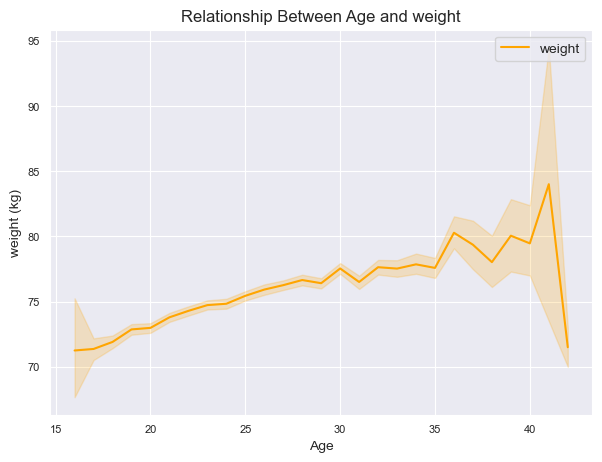

In [26]:
#comparison of age and weight 
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='age', y='weight_kg', data=data, color='orange', label='weight')
plt.title('Relationship Between Age and weight')
plt.xlabel('Age')
plt.ylabel('weight (kg)')
plt.grid(True)
plt.legend()
plt.show()


At the age 15 to 20 there is no difference in age after increasing the age the weight also increases gradually

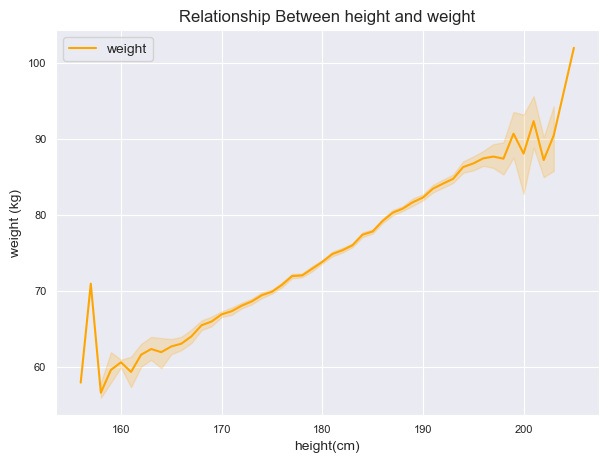

In [27]:
#comparison of height and weight
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='height_cm', y='weight_kg', data=data, color='orange', label='weight')
plt.title('Relationship Between height and weight')
plt.xlabel('height(cm)')
plt.ylabel('weight (kg)')
plt.grid(True)
plt.legend()
plt.show()

The graph shows that the height and weight at 160 and 70 are not normal it increases and gradually decreases and then after that it goes upwards.

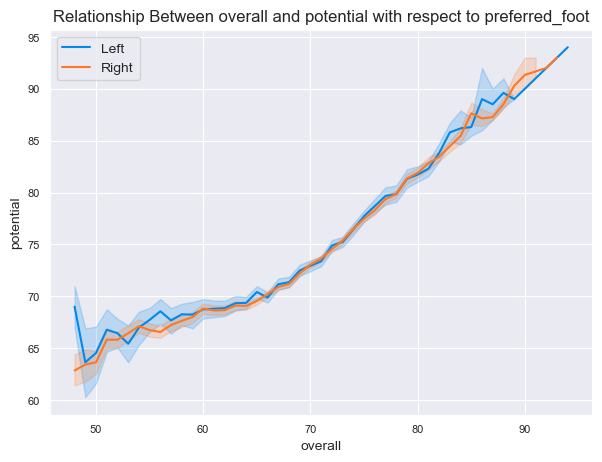

In [28]:
#comparison of overall and potential with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='overall', y='potential', data=data,hue='preferred_foot')
plt.title('Relationship Between overall and potential with respect to preferred_foot')
plt.xlabel('overall')
plt.ylabel('potential')
plt.grid(True)
plt.legend()
plt.show()

If the potential increases the overall score of the players are also increases

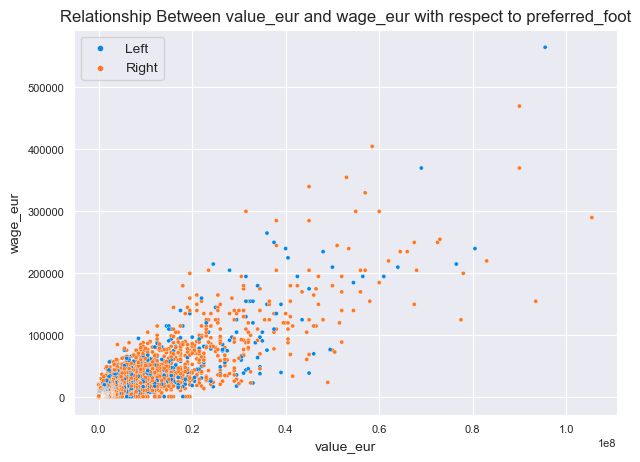

In [29]:
#comparison of value_eur and wage_eur with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.scatterplot(x='value_eur', y='wage_eur', data=data,hue='preferred_foot')
plt.title('Relationship Between value_eur and wage_eur with respect to preferred_foot')
plt.xlabel('value_eur')
plt.ylabel('wage_eur')
plt.grid(True)
plt.legend()
plt.show()

The most preferred foot is right and the most payed wage is for right foot between 0.0 and 0.2

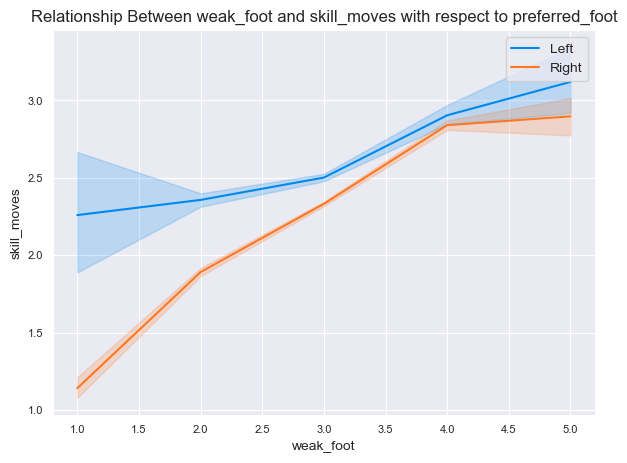

In [30]:
#comparison of weak_foot and skill_moves with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='weak_foot', y='skill_moves', data=data,hue='preferred_foot')
plt.title('Relationship Between weak_foot and skill_moves with respect to preferred_foot')
plt.xlabel('weak_foot')
plt.ylabel('skill_moves')
plt.grid(True)
plt.legend()
plt.show()

Compare to right foot the left foot player has the better moves and most of the weak_foot are right foot players

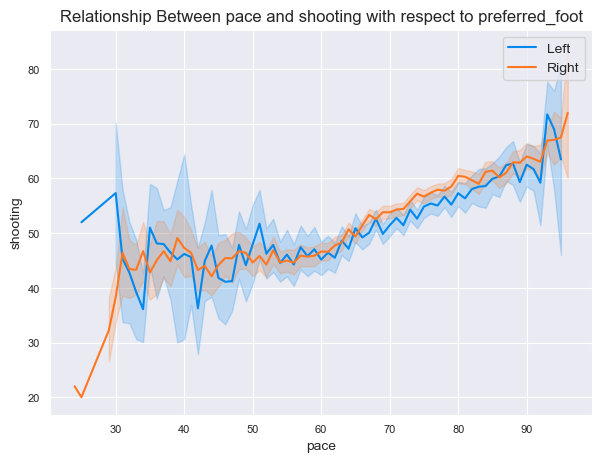

In [31]:
#comparison of pace and shooting with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='pace', y='shooting', data=data,hue='preferred_foot')
plt.title('Relationship Between pace and shooting with respect to preferred_foot')
plt.xlabel('pace')
plt.ylabel('shooting')
plt.grid(True)
plt.legend()
plt.show()

If the player is left foot the pace is low but shooting is heigher but if the player is right foot shooting and pace are both low

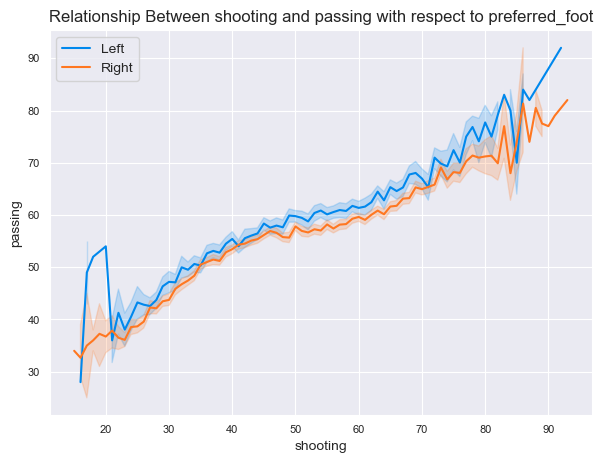

In [32]:
#comparison of shooting and passing with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='shooting', y='passing', data=data,hue='preferred_foot')
plt.title('Relationship Between shooting and passing with respect to preferred_foot')
plt.xlabel('shooting')
plt.ylabel('passing')
plt.grid(True)
plt.legend()
plt.show()

There is more difference in left foot and right foot.for left foot there is increase and decrease in graph but right foot has the continuous increase of graph. 

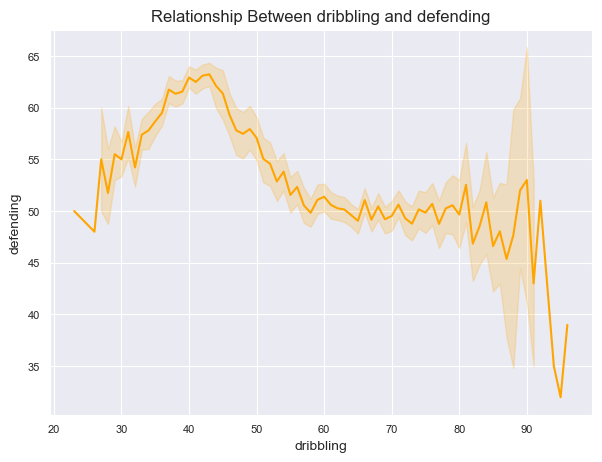

In [33]:
#comparison of dribbling and defending 
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='dribbling', y='defending', data=data,color='orange')
plt.title('Relationship Between dribbling and defending')
plt.xlabel('dribbling')
plt.ylabel('defending')
plt.grid(True)
plt.show()

The defending score is high when dribbling score is between 30 to 40, if the dribbling decreases the defending score also increases 

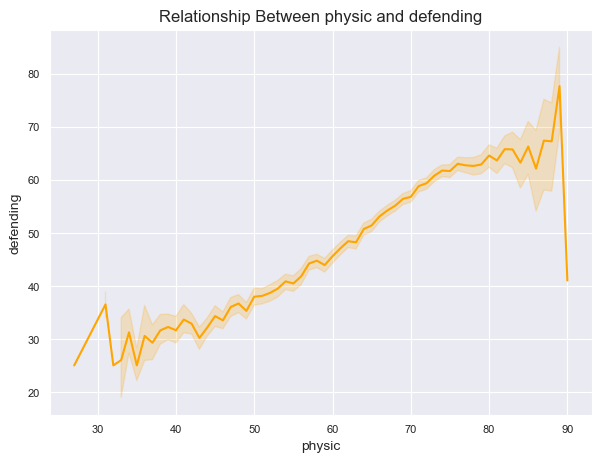

In [34]:
#comparison of physic and defending 
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='physic', y='defending', data=data,color='orange')
plt.title('Relationship Between physic and defending')
plt.xlabel('physic')
plt.ylabel('defending')
plt.grid(True)
plt.show()

Here comes we see that physic is important for the defending, if the physic decreases the defending score also decreases but the at sometime physic increases defending score decreases.

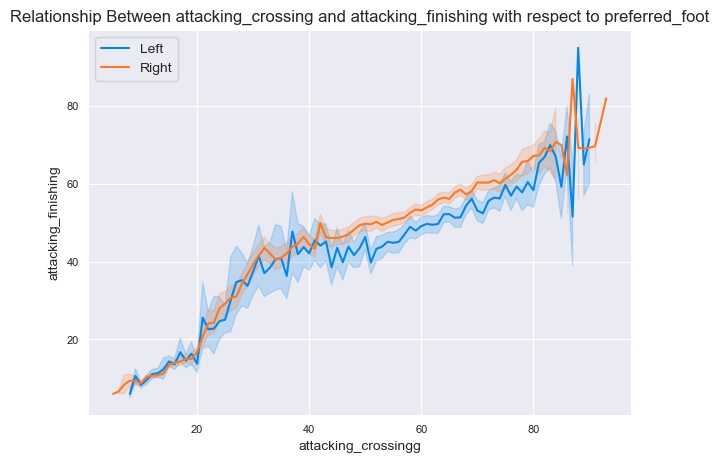

In [35]:
#comparison of attacking_crossing and attacking_finishing with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='attacking_crossing', y='attacking_finishing', data=data,hue='preferred_foot')
plt.title('Relationship Between attacking_crossing and attacking_finishing with respect to preferred_foot')
plt.xlabel('attacking_crossingg')
plt.ylabel('attacking_finishing')
plt.grid(True)
plt.legend()
plt.show()

For both foot has the more or less values of graph but the left foot has the slight increase and decrease of the values. we can set that right foot player has small accuracy in attack_finishing compare to left foot

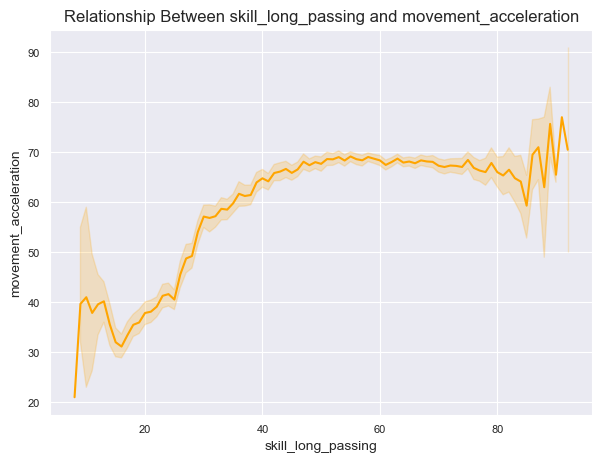

In [36]:
#comparison of skill_long_passing and movement_acceleration 
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='skill_long_passing', y='movement_acceleration', data=data,color='orange')
plt.title('Relationship Between skill_long_passing and movement_acceleration')
plt.xlabel('skill_long_passing')
plt.ylabel('movement_acceleration')
plt.grid(True)
plt.show()

When movement_acceleration increases the skill_long_passing also increases but more the acceleration increases the skill long passing deviates.

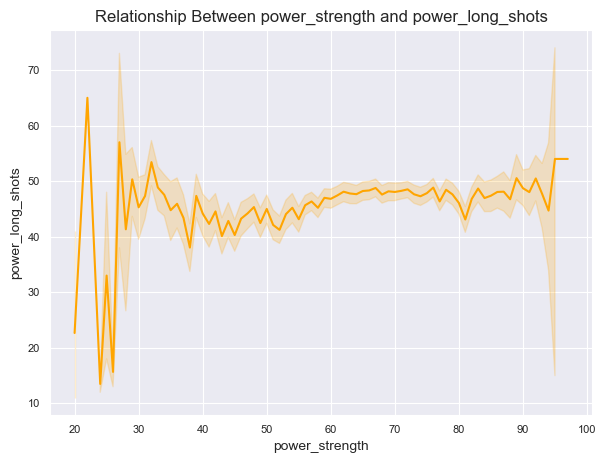

In [37]:
#comparison of power_strength and  power_long_shots
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='power_strength', y='power_long_shots', data=data,color='orange')
plt.title('Relationship Between power_strength and power_long_shots')
plt.xlabel('power_strength')
plt.ylabel('power_long_shots')
plt.grid(True)
plt.show()

The power_long_shots are ideal in between 50 to 60 but it deviates when it is low and as well as it goes high.

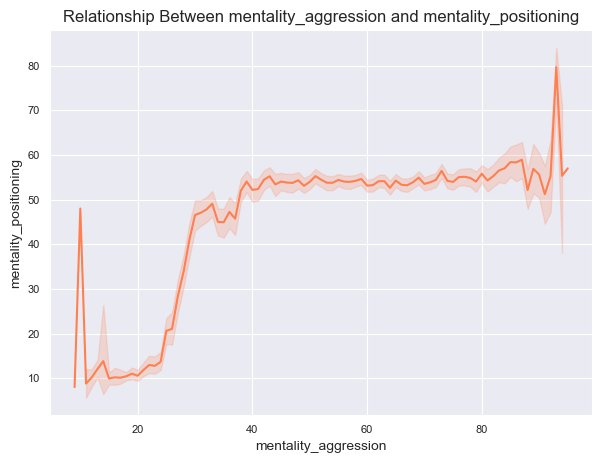

In [38]:
#comparison of mentality_aggression and  mentality_positioning
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='mentality_aggression', y='mentality_positioning', data=data,color='Coral')
plt.title('Relationship Between mentality_aggression and mentality_positioning')
plt.xlabel('mentality_aggression')
plt.ylabel('mentality_positioning')
plt.grid(True)
plt.show()

mentality_aggression and mentality positioning is ideal between 40 and 80 but it deviates between 10 to 20 and greater than 90 and 80.

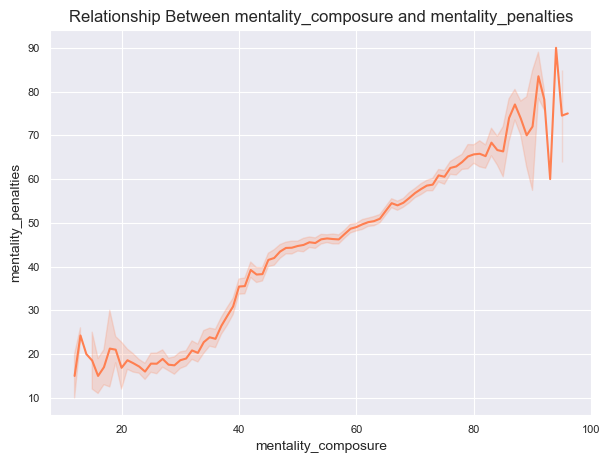

In [39]:
#comparison of mentality_composure and  mentality_penalties
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='mentality_composure', y='mentality_penalties', data=data,color='Coral')
plt.title('Relationship Between mentality_composure and mentality_penalties')
plt.xlabel('mentality_composure')
plt.ylabel('mentality_penalties')
plt.grid(True)
plt.show()

If the mentality_composure increases the penalities also increases

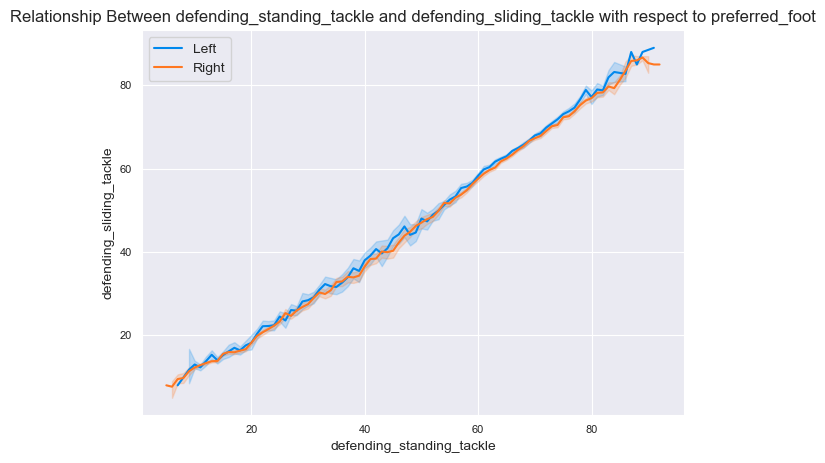

In [40]:
#comparison of defending_standing_tackle and defending_sliding_tackle with respect to preferred foot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(x='defending_standing_tackle', y='defending_sliding_tackle', data=data,hue='preferred_foot')
plt.title('Relationship Between defending_standing_tackle and defending_sliding_tackle with respect to preferred_foot')
plt.xlabel('defending_standing_tackle')
plt.ylabel('defending_sliding_tackle')
plt.grid(True)
plt.legend()
plt.show()

If the defending tackle increases the defending tackle also increases

## Task 3A

rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level

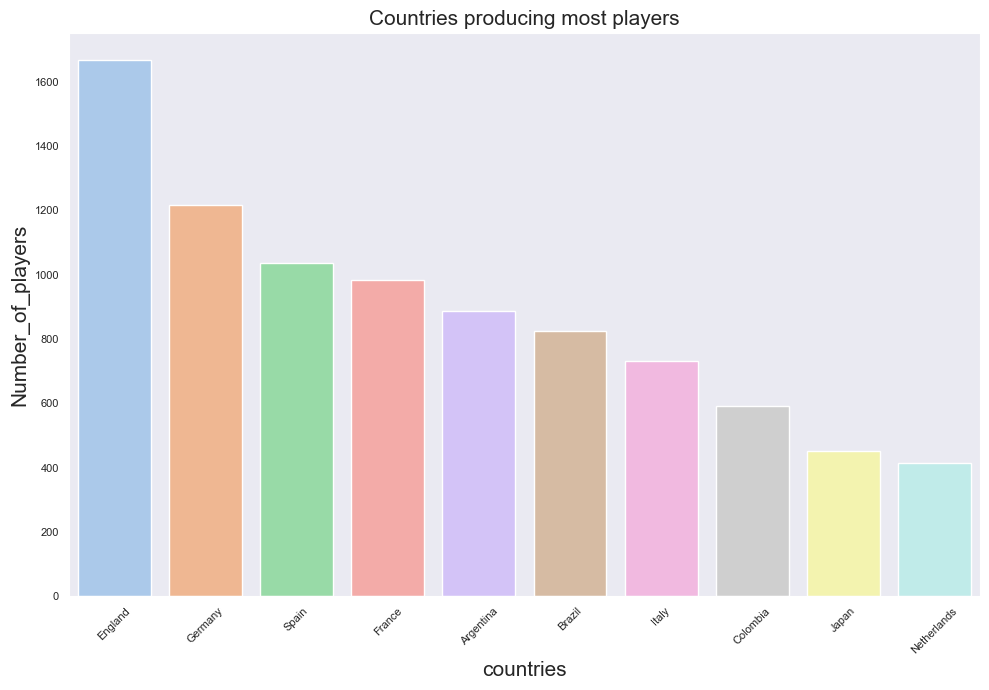

In [41]:
countries=data['nationality'].value_counts().head(10)
plt.figure(figsize=(10,7),facecolor='white')
sns.barplot(x=countries.index,y=countries.values,palette='pastel')
plt.xlabel('countries',fontsize=15)
plt.ylabel('Number_of_players',fontsize=15)
plt.title('Countries producing most players',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

England ranks the top most in producing players compare to all countries. It results in more than 1600 players. The second most is Germany,spain,and france

## Task 3B

Find the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving 

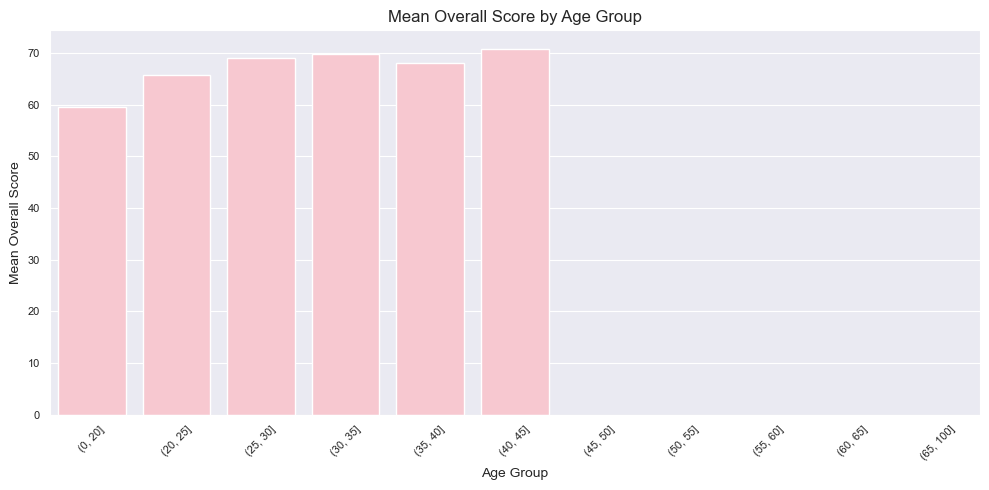

In [42]:
age=[0,20,25,30,35,40,45,50,55,60,65,100]
data['age_group']=pd.cut(data['age'],bins=age)
overall_mean=data.groupby('age_group')['overall'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x='age_group',y='overall',data=overall_mean,color='pink')
plt.xlabel('Age Group')
plt.ylabel('Mean Overall Score')
plt.title('Mean Overall Score by Age Group')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()
data.drop('age_group',axis=1,inplace=True)

After analyzing the mena of the different age groups we can see that there is no drop after the specific age, players are playing continuously after the significant ages.The overall mean is flat it will stop after the age of above 45,

## Task 3C 

Type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger

In [43]:
data.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"Speedster, Dribbler, Distance Shooter, Acrobat...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [44]:
position_salary_mean = data.groupby('player_positions')['value_eur'].mean().reset_index()

# Sort the positions by mean salary in descending order
position_salary_mean = position_salary_mean.sort_values(by='value_eur', ascending=False)

# Determine which position gets paid the most
highest_paid_position = position_salary_mean.iloc[0]['player_positions']

# Display the result
print(f"The highest-paid position among strikers, right-wingers, and left-wingers is: {highest_paid_position}")

The highest-paid position among strikers, right-wingers, and left-wingers is: RW, CF, ST


In [45]:
data.loc[data['value_eur']==data['value_eur'].max()][['short_name','value_eur']]

,short_name,value_eur
2,Neymar Jr,105500000


Neymar Jr is heighest paid football player with euros of 105.5 million

### DATA PREPROCESSING

### Handling null values 

In [46]:
#checking null values
pd.set_option('display.max_rows',None)
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                        

In [47]:
#calculating missing percentage for imuputing missing values
def missing_percentage(data):
    # Calculate the total number of missing values in each column
    total_missing = data.isnull().sum()
    # Calculate the total number of values in each column
    total_values = data.count()
    # Calculate the percentage of missing values
    percentage_missing = (total_missing / (total_missing + total_values)) * 100
    # Determine the data type of each column
    data_types = data.dtypes
    # Create a DataFrame to store the results
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Total Values': total_values, 'Percentage Missing': percentage_missing, 'Data Type': data_types})
    return missing_data

In [48]:
missing_percentage(data)

,Total Missing,Total Values,Percentage Missing,Data Type
short_name,0,18278,0.000000,object
age,0,18278,0.000000,int64
height_cm,0,18278,0.000000,int64
weight_kg,0,18278,0.000000,int64
nationality,0,18278,0.000000,object
club,0,18278,0.000000,object
overall,0,18278,0.000000,int64
potential,0,18278,0.000000,int64
value_eur,0,18278,0.000000,int64
wage_eur,0,18278,0.000000,int64


Here we can see that there are large number of missing values like 70 to 90 percentage of values, we can drop those columns based on the feature importance on feature engineering. so, now we can impute those has less percentage of null values with less than 15%.

In [49]:
#imputing msissng values
data1=data[['release_clause_eur','team_jersey_number','contract_valid_until','pace','shooting','passing','dribbling','defending','physic']]
data.loc[data['release_clause_eur'].isnull(),'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['team_jersey_number'].isnull(),'team_jersey_number']=data['team_jersey_number'].median()
data.loc[data['contract_valid_until'].isnull(),'contract_valid_until']=data['contract_valid_until'].median()
data.loc[data['pace'].isnull(),'pace']=data['pace'].median()
data.loc[data['passing'].isnull(),'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull(),'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull(),'defending']=data['defending'].median()
data.loc[data['physic'].isnull(),'physic']=data['physic'].median()
data.loc[data['shooting'].isnull(),'shooting']=data['shooting'].median()

Handling null values for categorical values

In [50]:
data['team_position'] = data['team_position'].replace(np.nan,'SUB')

In [51]:
print('release_clause_eur:',data['release_clause_eur'].isnull().sum())
print('team_jersey_number:',data['team_jersey_number'].isnull().sum())
print('contract_valid_until:',data['contract_valid_until'].isnull().sum())
print('pace:',data['pace'].isnull().sum())
print('shooting:',data['shooting'].isnull().sum())
print('passing:',data['passing'].isnull().sum())
print('dribbling:',data['dribbling'].isnull().sum())
print('defending:',data['defending'].isnull().sum())
print('physic:',data['physic'].isnull().sum())

release_clause_eur: 0
team_jersey_number: 0
contract_valid_until: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


### Outlier Handling

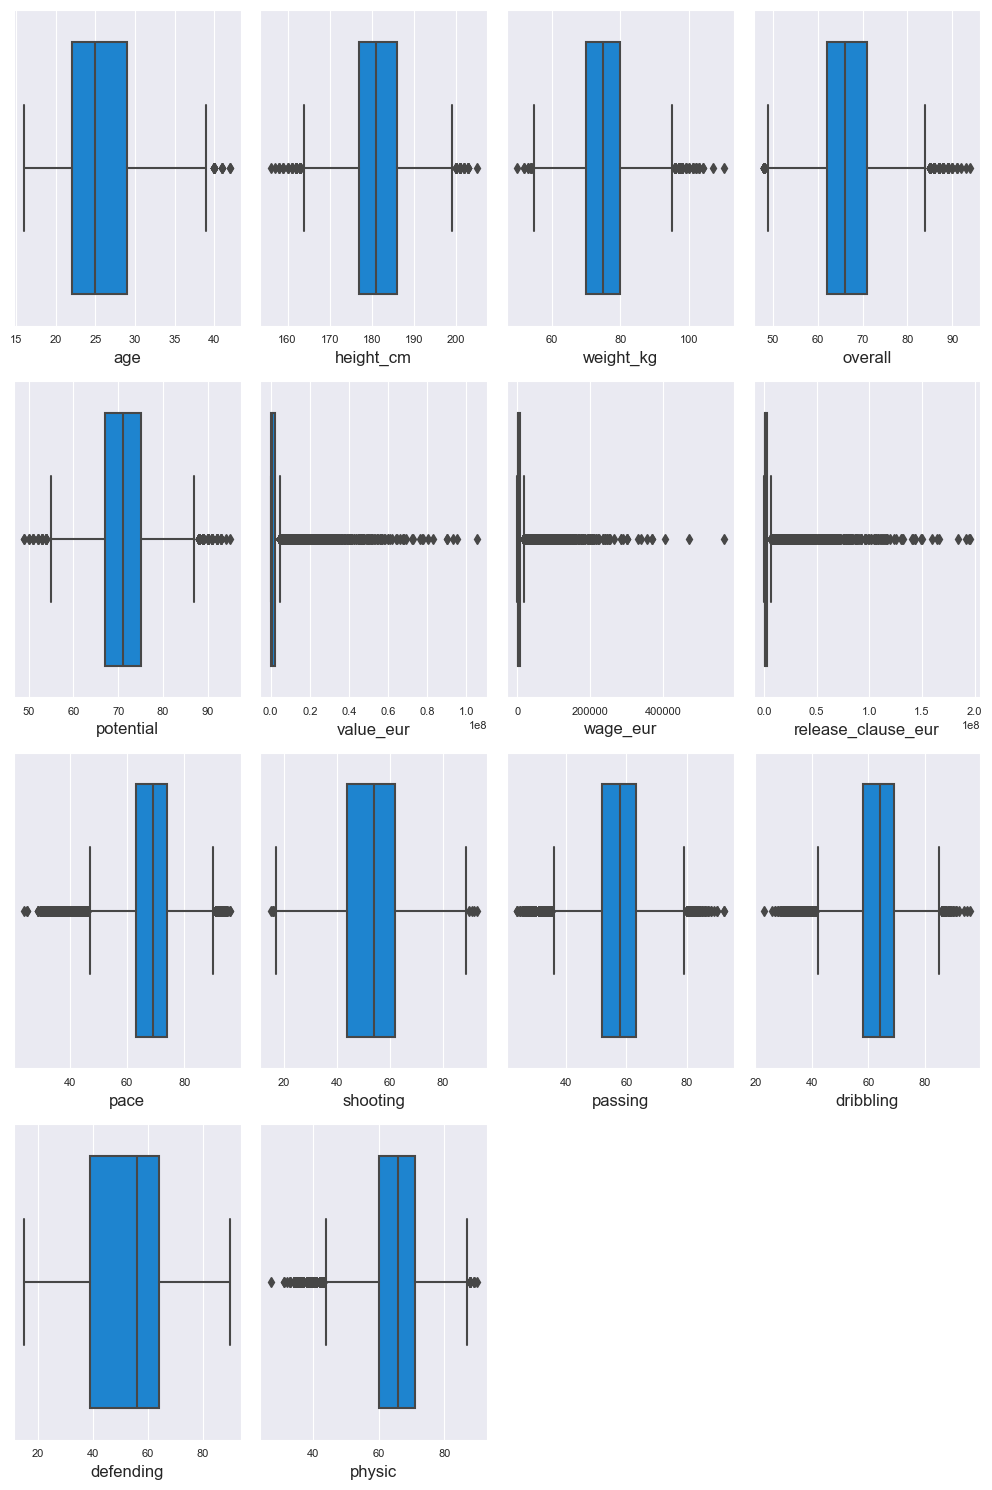

In [52]:
#Handling outliers
pd.reset_option('display.max_rows',None)
data2=data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace','shooting',
            'passing','dribbling','defending','physic']]
plt.figure(figsize=(10,15))
plotnumber=1

for column in data2:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data2[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()
    

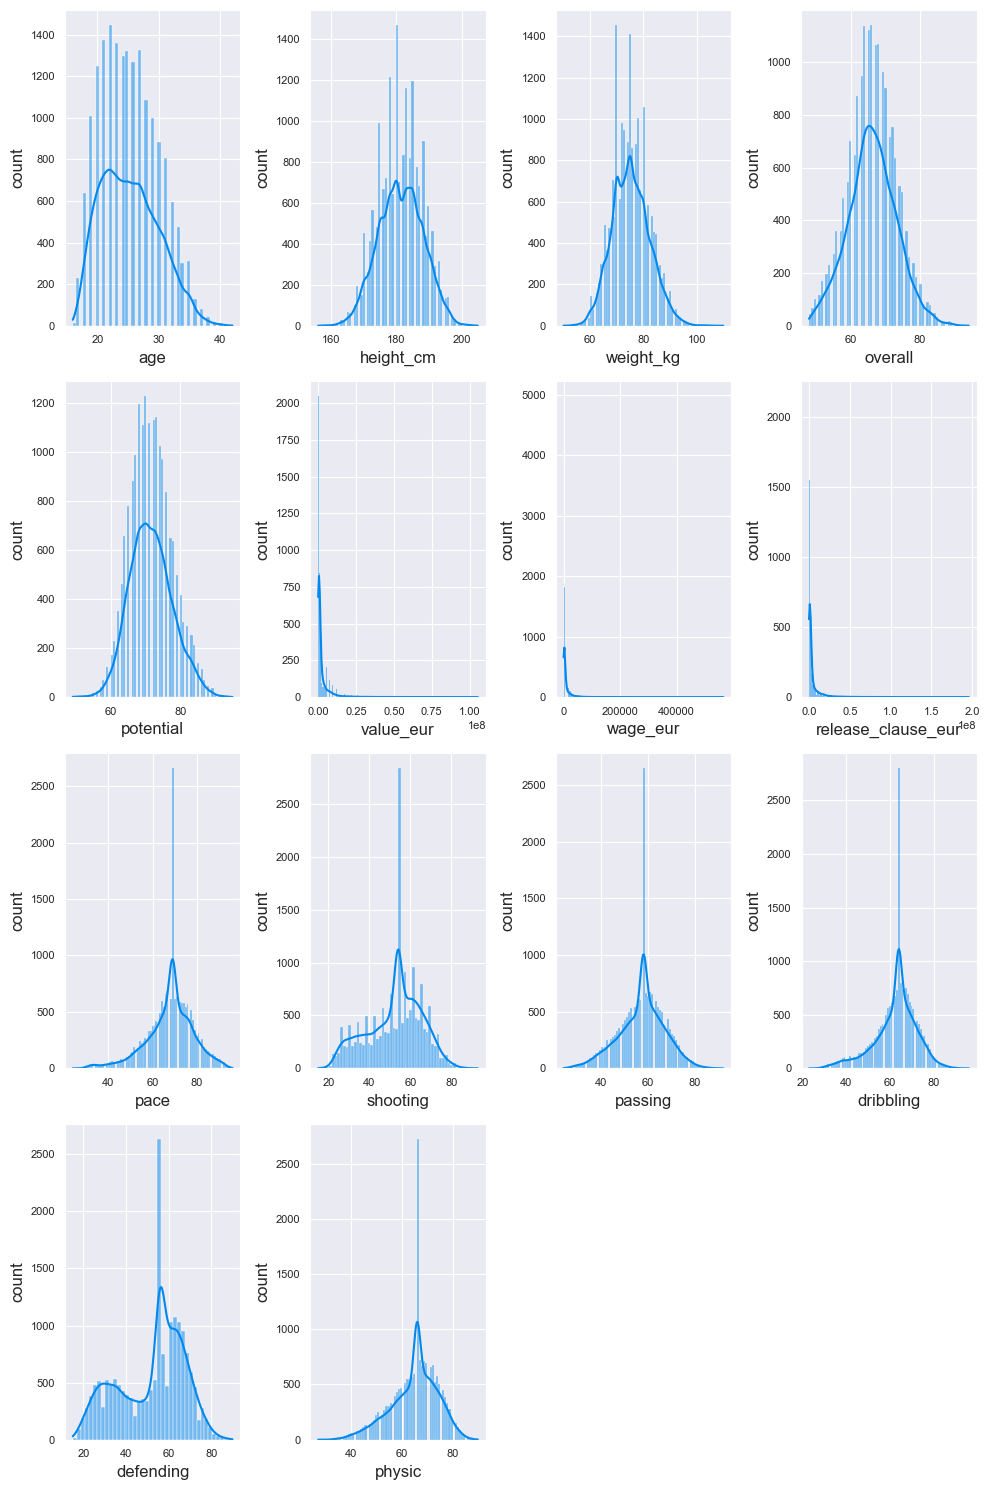

In [53]:
#checking distribution for handling outliers
plt.figure(figsize=(10,15))
plotnumber=1

for column in data2:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column],kde=True)
        plt.xlabel(column,fontsize=12)
        plt.ylabel('count',fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()

Here we have both normal distribution and not a normal distribution, so we have to use IQR and 3 sigma rule to handle those outliers.

In [54]:
#3 sigma rule for normal distribution data
# handling outliers for age
upper_limit=data.age.mean()+3*data.age.std()
print('upper_limit is:',upper_limit)
lower_limit=data.age.mean()-3*data.age.std()
print('lower_limit is:',lower_limit)

upper_limit is: 39.25418488202056
lower_limit is: 11.312397895088532


In [55]:
len(data.loc[data['age']> upper_limit])/len(data)

0.0010395010395010396

In [56]:
data.loc[data['age']> upper_limit,'age']=data['age'].mean()

<Axes: xlabel='age'>

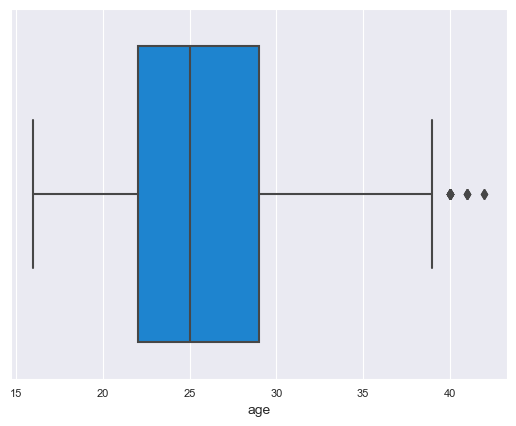

In [57]:
sns.boxplot(x=data2['age'])

In [58]:
# handling outliers for height_cm
upper_limit=data.height_cm.mean()+3*data.height_cm.std()
print('upper_limit is:',upper_limit)
lower_limit=data.height_cm.mean()-3*data.height_cm.std()
print('lower_limit is:',lower_limit)

upper_limit is: 201.6330681374958
lower_limit is: 161.09129995529332


In [59]:
print(len(data.loc[data['height_cm']> upper_limit])/len(data))
print(len(data.loc[data['height_cm']< lower_limit])/len(data))

0.0006018163912900755
0.000875369296421928


In [60]:
data.loc[data['height_cm']> upper_limit,'height_cm']=data['height_cm'].mean()
data.loc[data['height_cm']< lower_limit,'height_cm']=data['height_cm'].mean()

<Axes: xlabel='height_cm'>

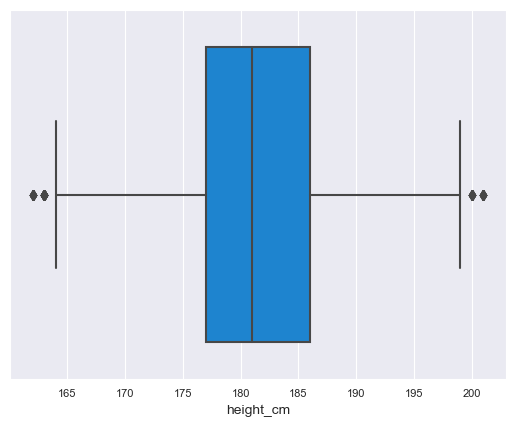

In [61]:
sns.boxplot(x=data['height_cm'])

In [62]:
# handling outliers for weight_kg
upper_limit=data.weight_kg.mean()+3*data.weight_kg.std()
print('upper_limit is:',upper_limit)
lower_limit=data.weight_kg.mean()-3*data.weight_kg.std()
print('lower_limit is:',lower_limit)

upper_limit is: 96.41957385582987
lower_limit is: 54.13311243369853


In [63]:
print(len(data.loc[data['weight_kg']> upper_limit])/len(data))
print(len(data.loc[data['weight_kg']< lower_limit])/len(data))

0.0022431338220811905
0.0006018163912900755


In [64]:
data.loc[data['weight_kg']> upper_limit,'weight_kg']=data['weight_kg'].mean()
data.loc[data['weight_kg']< lower_limit,'weight_kg']=data['weight_kg'].mean()

<Axes: xlabel='weight_kg'>

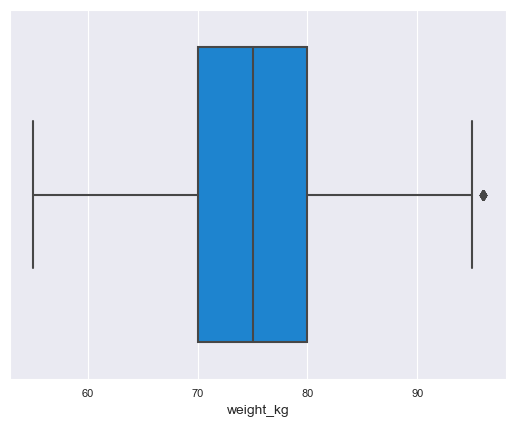

In [65]:
sns.boxplot(x=data['weight_kg'])

In [66]:
# handling outliers for overall
upper_limit=data.overall.mean()+3*data.overall.std()
print('upper_limit is:',upper_limit)
lower_limit=data.overall.mean()-3*data.overall.std()
print('lower_limit is:',lower_limit)

upper_limit is: 87.09485374672605
lower_limit is: 45.395134216946126


In [67]:
print(len(data.loc[data['overall']> upper_limit])/len(data))
print(len(data.loc[data['overall']< lower_limit])/len(data))

0.00218842324105482
0.0


In [68]:
data.loc[data['overall']> upper_limit,'overall']=data['overall'].mean()

<Axes: xlabel='overall'>

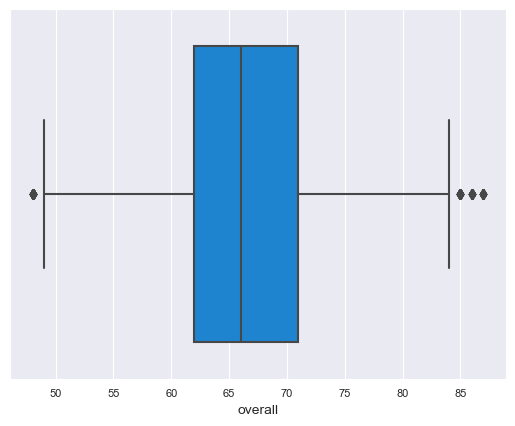

In [69]:
sns.boxplot(x=data['overall'])

In [70]:
# handling outliers for potential
upper_limit=data.potential.mean()+3*data.potential.std()
print('upper_limit is:',upper_limit)
lower_limit=data.potential.mean()-3*data.potential.std()
print('lower_limit is:',lower_limit)

upper_limit is: 89.96589419280835
lower_limit is: 53.12787974307086


In [71]:
print(len(data.loc[data['potential']> upper_limit])/len(data))
print(len(data.loc[data['potential']< lower_limit])/len(data))

0.0021337126600284497
0.0009300798774482985


In [72]:
data.loc[data['potential']> upper_limit,'potential']=data['potential'].mean()
data.loc[data['potential']< lower_limit,'potential']=data['potential'].mean()

<Axes: xlabel='potential'>

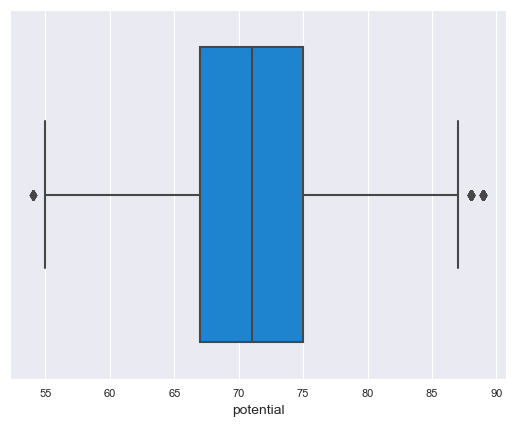

In [73]:
sns.boxplot(x=data['potential'])

In [74]:
#IQR for not normal distribution
#Handling outlier for value_eur
Q1=data['value_eur'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['value_eur'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 325000.0
Q3 is: 2100000.0


In [75]:
IQR=Q3-Q1
IQR

1775000.0

In [76]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: -2337500.0
upper_limit is: 4762500.0


In [77]:
print(len(data.loc[data['value_eur']> upper_limit])/len(data))
print(len(data.loc[data['value_eur']< lower_limit])/len(data))

0.13737826895721633
0.0


Here the percentage of ooutlier is greater than 5% so we don't have to impute outlier

In [78]:
#Handling outlier for wage_eur
Q1=data['wage_eur'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['wage_eur'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 1000.0
Q3 is: 8000.0


In [79]:
IQR=Q3-Q1
IQR

7000.0

In [80]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: -9500.0
upper_limit is: 18500.0


In [81]:
print(len(data.loc[data['wage_eur']> upper_limit])/len(data))
print(len(data.loc[data['wage_eur']< lower_limit])/len(data))

0.12911697122223437
0.0


wage_eur also has the outlier percentage of more than 5% so we don't have to handle oulier

In [82]:
#Handling outlier for release_clause_eur
Q1=data['release_clause_eur'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['release_clause_eur'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 596000.0
Q3 is: 3200000.0


In [83]:
IQR=Q3-Q1
IQR

2604000.0

In [84]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: -3310000.0
upper_limit is: 7106000.0


In [85]:
print(len(data.loc[data['release_clause_eur']> upper_limit])/len(data))
print(len(data.loc[data['release_clause_eur']< lower_limit])/len(data))

0.15368202210307474
0.0


Here also the percentage of outlier is greater than 5% do we dont want to handle those

In [86]:
#Handling outlier for pace
Q1=data['pace'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['pace'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 63.0
Q3 is: 74.0


In [87]:
IQR=Q3-Q1
IQR

11.0

In [88]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 46.5
upper_limit is: 90.5


In [89]:
print(len(data.loc[data['pace']> upper_limit])/len(data))
print(len(data.loc[data['pace']< lower_limit])/len(data))

0.010285589232957654
0.0419083050661998


In [90]:
data.loc[data['pace']> upper_limit,'pace']=data['pace'].median()
data.loc[data['pace']< lower_limit,'pace']=data['pace'].median()

<Axes: xlabel='pace'>

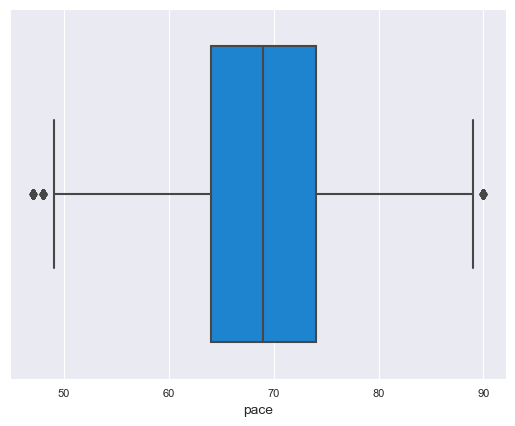

In [91]:
sns.boxplot(x=data['pace'])

In [92]:
#Handling outlier for shooting
Q1=data['shooting'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['shooting'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 44.0
Q3 is: 62.0


In [93]:
IQR=Q3-Q1
IQR

18.0

In [94]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 17.0
upper_limit is: 89.0


In [95]:
print(len(data.loc[data['shooting']> upper_limit])/len(data))
print(len(data.loc[data['shooting']< lower_limit])/len(data))

0.000218842324105482
0.0002735529051318525


In [96]:
data.loc[data['shooting']> upper_limit,'shooting']=data['shooting'].median()
data.loc[data['shooting']< lower_limit,'shooting']=data['shooting'].median()

<Axes: xlabel='shooting'>

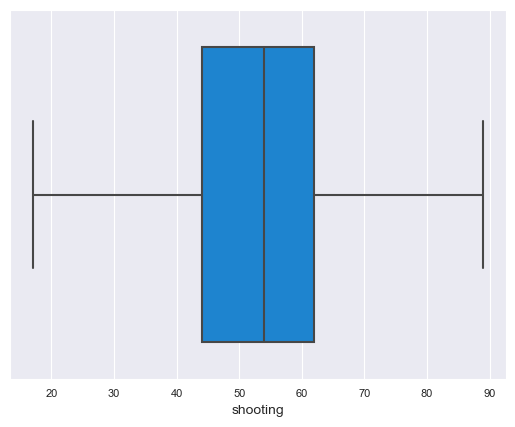

In [97]:
sns.boxplot(x=data['shooting'])

In [98]:
#Handling outlier for passing
Q1=data['passing'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['passing'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 52.0
Q3 is: 63.0


In [99]:
IQR=Q3-Q1
IQR

11.0

In [100]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 35.5
upper_limit is: 79.5


In [101]:
print(len(data.loc[data['passing']> upper_limit])/len(data))
print(len(data.loc[data['passing']< lower_limit])/len(data))

0.008261297734981946
0.022595469963891016


In [102]:
data.loc[data['passing']> upper_limit,'passing']=data['passing'].median()
data.loc[data['passing']< lower_limit,'passing']=data['passing'].median()

<Axes: xlabel='passing'>

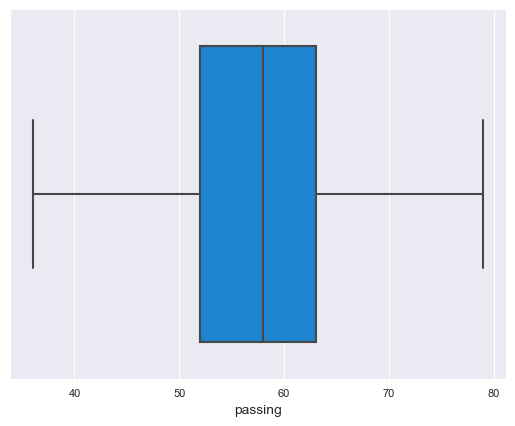

In [103]:
sns.boxplot(x=data['passing'])

In [104]:
#Handling outlier for dribbling
Q1=data['dribbling'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['dribbling'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 58.0
Q3 is: 69.0


In [105]:
IQR=Q3-Q1
IQR

11.0

In [106]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 41.5
upper_limit is: 85.5


In [107]:
print(len(data.loc[data['dribbling']> upper_limit])/len(data))
print(len(data.loc[data['dribbling']< lower_limit])/len(data))

0.004048582995951417
0.04048582995951417


In [108]:
data.loc[data['dribbling']> upper_limit,'dribbling']=data['dribbling'].median()
data.loc[data['dribbling']< lower_limit,'dribbling']=data['dribbling'].median()

<Axes: xlabel='dribbling'>

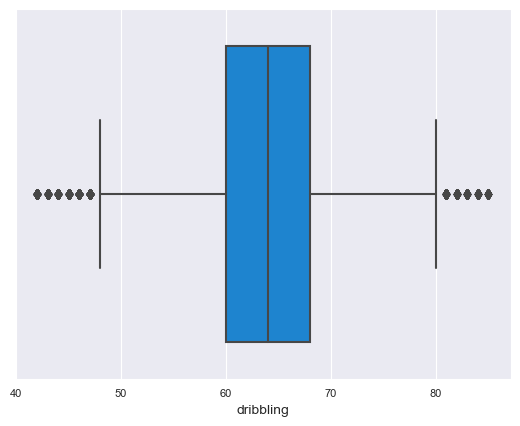

In [109]:
sns.boxplot(x=data['dribbling'])

In [110]:
#Handling outlier for defending
Q1=data['defending'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['defending'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 39.0
Q3 is: 64.0


In [111]:
IQR=Q3-Q1
IQR

25.0

In [112]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 1.5
upper_limit is: 101.5


In [113]:
print(len(data.loc[data['defending']> upper_limit])/len(data))
print(len(data.loc[data['defending']< lower_limit])/len(data))

0.0
0.0


Here there is no outlier so we don't have to handle this

In [114]:
#Handling outlier for physic
Q1=data['physic'].quantile(0.25)
print('Q1 is:',Q1)
Q3=data['physic'].quantile(0.75)
print('Q3 is:',Q3)

Q1 is: 60.0
Q3 is: 71.0


In [115]:
IQR=Q3-Q1
IQR

11.0

In [116]:
lower_limit=Q1-1.5*IQR
print('lower_limit is:',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper_limit is:',upper_limit)

lower_limit is: 43.5
upper_limit is: 87.5


In [117]:
print(len(data.loc[data['physic']> upper_limit])/len(data))
print(len(data.loc[data['physic']< lower_limit])/len(data))

0.000656526972316446
0.02303315461210198


In [118]:
data.loc[data['physic']> upper_limit,'physic']=data['physic'].median()
data.loc[data['physic']< lower_limit,'physic']=data['physic'].median()

<Axes: xlabel='physic'>

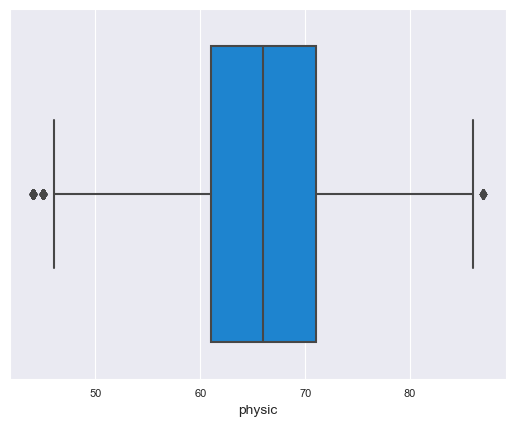

In [119]:
sns.boxplot(x=data['physic'])

 ### Scaling
 We have lot of variation in value so we have to scale those values into 0 to 1. we use minmax scaler to scale those values

In [120]:
data.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32.0,170.0,72.0,Argentina,FC Barcelona,66.244994,71.546887,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,54.0,58.0,64.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34.0,187.0,83.0,Portugal,Juventus,66.244994,71.546887,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"Speedster, Dribbler, Distance Shooter, Acrobat...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,54.0,58.0,64.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [121]:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_re

In [122]:
# taking only numerical values to scale
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaling.fit_transform(data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']])

In [123]:
data.head(1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,0.695652,0.205128,0.414634,Argentina,FC Barcelona,0.46782,0.50134,0.905213,1.0,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,1.0,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,0.930233,0.513889,0.511628,0.511628,0.32,0.511628,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",0.943182,1.0,0.738636,1.0,0.977011,1.0,0.988636,1.0,1.0,1.0,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.0,0.453488,0.41573,0.989247,1.0,0.8,1.0,0.344086,0.367816,0.264368,0.05618,0.10989,0.152174,0.144444,0.076923,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


Thus we have scaled the numerical values from 0 to 1 range

### Normalisation
There are some categorical values in data so we have change categorical to numerical values

In [124]:
# we only change important columns in the data. the important columns are preferred foot and team position

In [125]:
#changing preferred_foot
data.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [126]:
#Here right foot has the heighest values so we can give 1 for right and 0 for left

In [127]:
data.preferred_foot=data.preferred_foot.map({'Right':1,'Left':0})

In [128]:
#changing team_position
data.team_position.value_counts()

SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [129]:
# we can replace based on the heighest values
data.team_position=data.team_position.map({'CF':0,'LF':1,'RF':2,'LAM':3,'RAM':4,'LWB':5,'LWB':6,'RWB':7,'CM':8,'CB':9,
                                          'RW':10,'LW':11,'CDM':12,'LS':13,'RS':14,'LDM':15,'RDM':16,'CAM':17,'LM':18,'RM':19,
                                          'LCM':20,'RCM':21,'ST':22,'LB':23,'RB':24,'LCB':25,'RCB':26,'GK':27,'RES':28,'SUB':29})

We have changed all categorical values into numerical values. next we have proceed to other steps

### FEATURE ENGINEERING

#### Dropping constant and unique features

In [130]:
data.drop(['nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [131]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement

In [132]:
data.head(2)

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,0.695652,0.205128,0.414634,0.46782,0.50134,0.905213,1.000000,0,5,4,4,1.000000,10,0.930233,0.513889,0.511628,0.511628,0.320000,0.511628,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.0,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.10989,0.152174,0.144444,0.076923
1,Cristiano Ronaldo,0.782609,0.641026,0.682927,0.46782,0.50134,0.554502,0.716814,1,5,4,5,0.492816,11,1.000000,0.513889,0.511628,0.511628,0.266667,0.790698,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.8,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.10989,0.152174,0.144444,0.109890


In [133]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [134]:
# checking correlation
data.corr()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
age,1.000000,0.081826,0.235509,0.465942,-0.263496,0.083345,0.152189,0.006318,0.256318,0.073591,...,0.143095,0.370790,0.159563,0.119566,0.104168,0.107007,0.109208,0.108890,0.117237,0.108485
height_cm,0.081826,1.000000,0.758770,0.040680,-0.002577,0.010298,0.019600,0.083466,0.038448,-0.173892,...,-0.333835,-0.157882,-0.076984,-0.068868,-0.077487,0.366298,0.366080,0.363583,0.365898,0.366145
weight_kg,0.235509,0.758770,1.000000,0.152620,-0.015065,0.049439,0.063460,0.076585,0.089659,-0.126301,...,-0.242049,-0.053070,-0.045115,-0.048719,-0.060498,0.334619,0.336499,0.332997,0.337138,0.335983
overall,0.465942,0.040680,0.152620,1.000000,0.627283,0.568768,0.496974,-0.035088,0.431482,0.227064,...,0.344874,0.713519,0.305655,0.253197,0.223361,-0.017887,-0.018431,-0.022055,-0.011307,-0.017552
potential,-0.263496,-0.002577,-0.015065,0.627283,1.000000,0.516943,0.422453,-0.030394,0.314631,0.164259,...,0.222189,0.433337,0.166858,0.144522,0.128947,-0.052730,-0.053520,-0.058758,-0.052142,-0.054159
value_eur,0.083345,0.010298,0.049439,0.568768,0.516943,1.000000,0.858052,-0.012596,0.618133,0.169084,...,0.234947,0.457112,0.154734,0.125180,0.102949,-0.022094,-0.022119,-0.023048,-0.020554,-0.021607
wage_eur,0.152189,0.019600,0.063460,0.496974,0.422453,0.858052,1.000000,-0.013084,0.652061,0.149405,...,0.222270,0.420750,0.155790,0.133316,0.114830,-0.023629,-0.023590,-0.024679,-0.022428,-0.024253
preferred_foot,0.006318,0.083466,0.076585,-0.035088,-0.030394,-0.012596,-0.013084,1.000000,0.004946,0.075437,...,-0.054108,-0.050702,-0.099526,-0.105236,-0.114355,0.099766,0.100904,0.104628,0.102419,0.101472
international_reputation,0.256318,0.038448,0.089659,0.431482,0.314631,0.618133,0.652061,0.004946,1.000000,0.127792,...,0.213138,0.374820,0.115698,0.090577,0.076013,0.006039,0.005962,0.004454,0.008561,0.005989
weak_foot,0.073591,-0.173892,-0.126301,0.227064,0.164259,0.169084,0.149405,0.075437,0.127792,1.000000,...,0.343126,0.301729,0.073902,0.048145,0.029001,-0.232714,-0.232357,-0.228380,-0.230529,-0.233494


<Axes: >

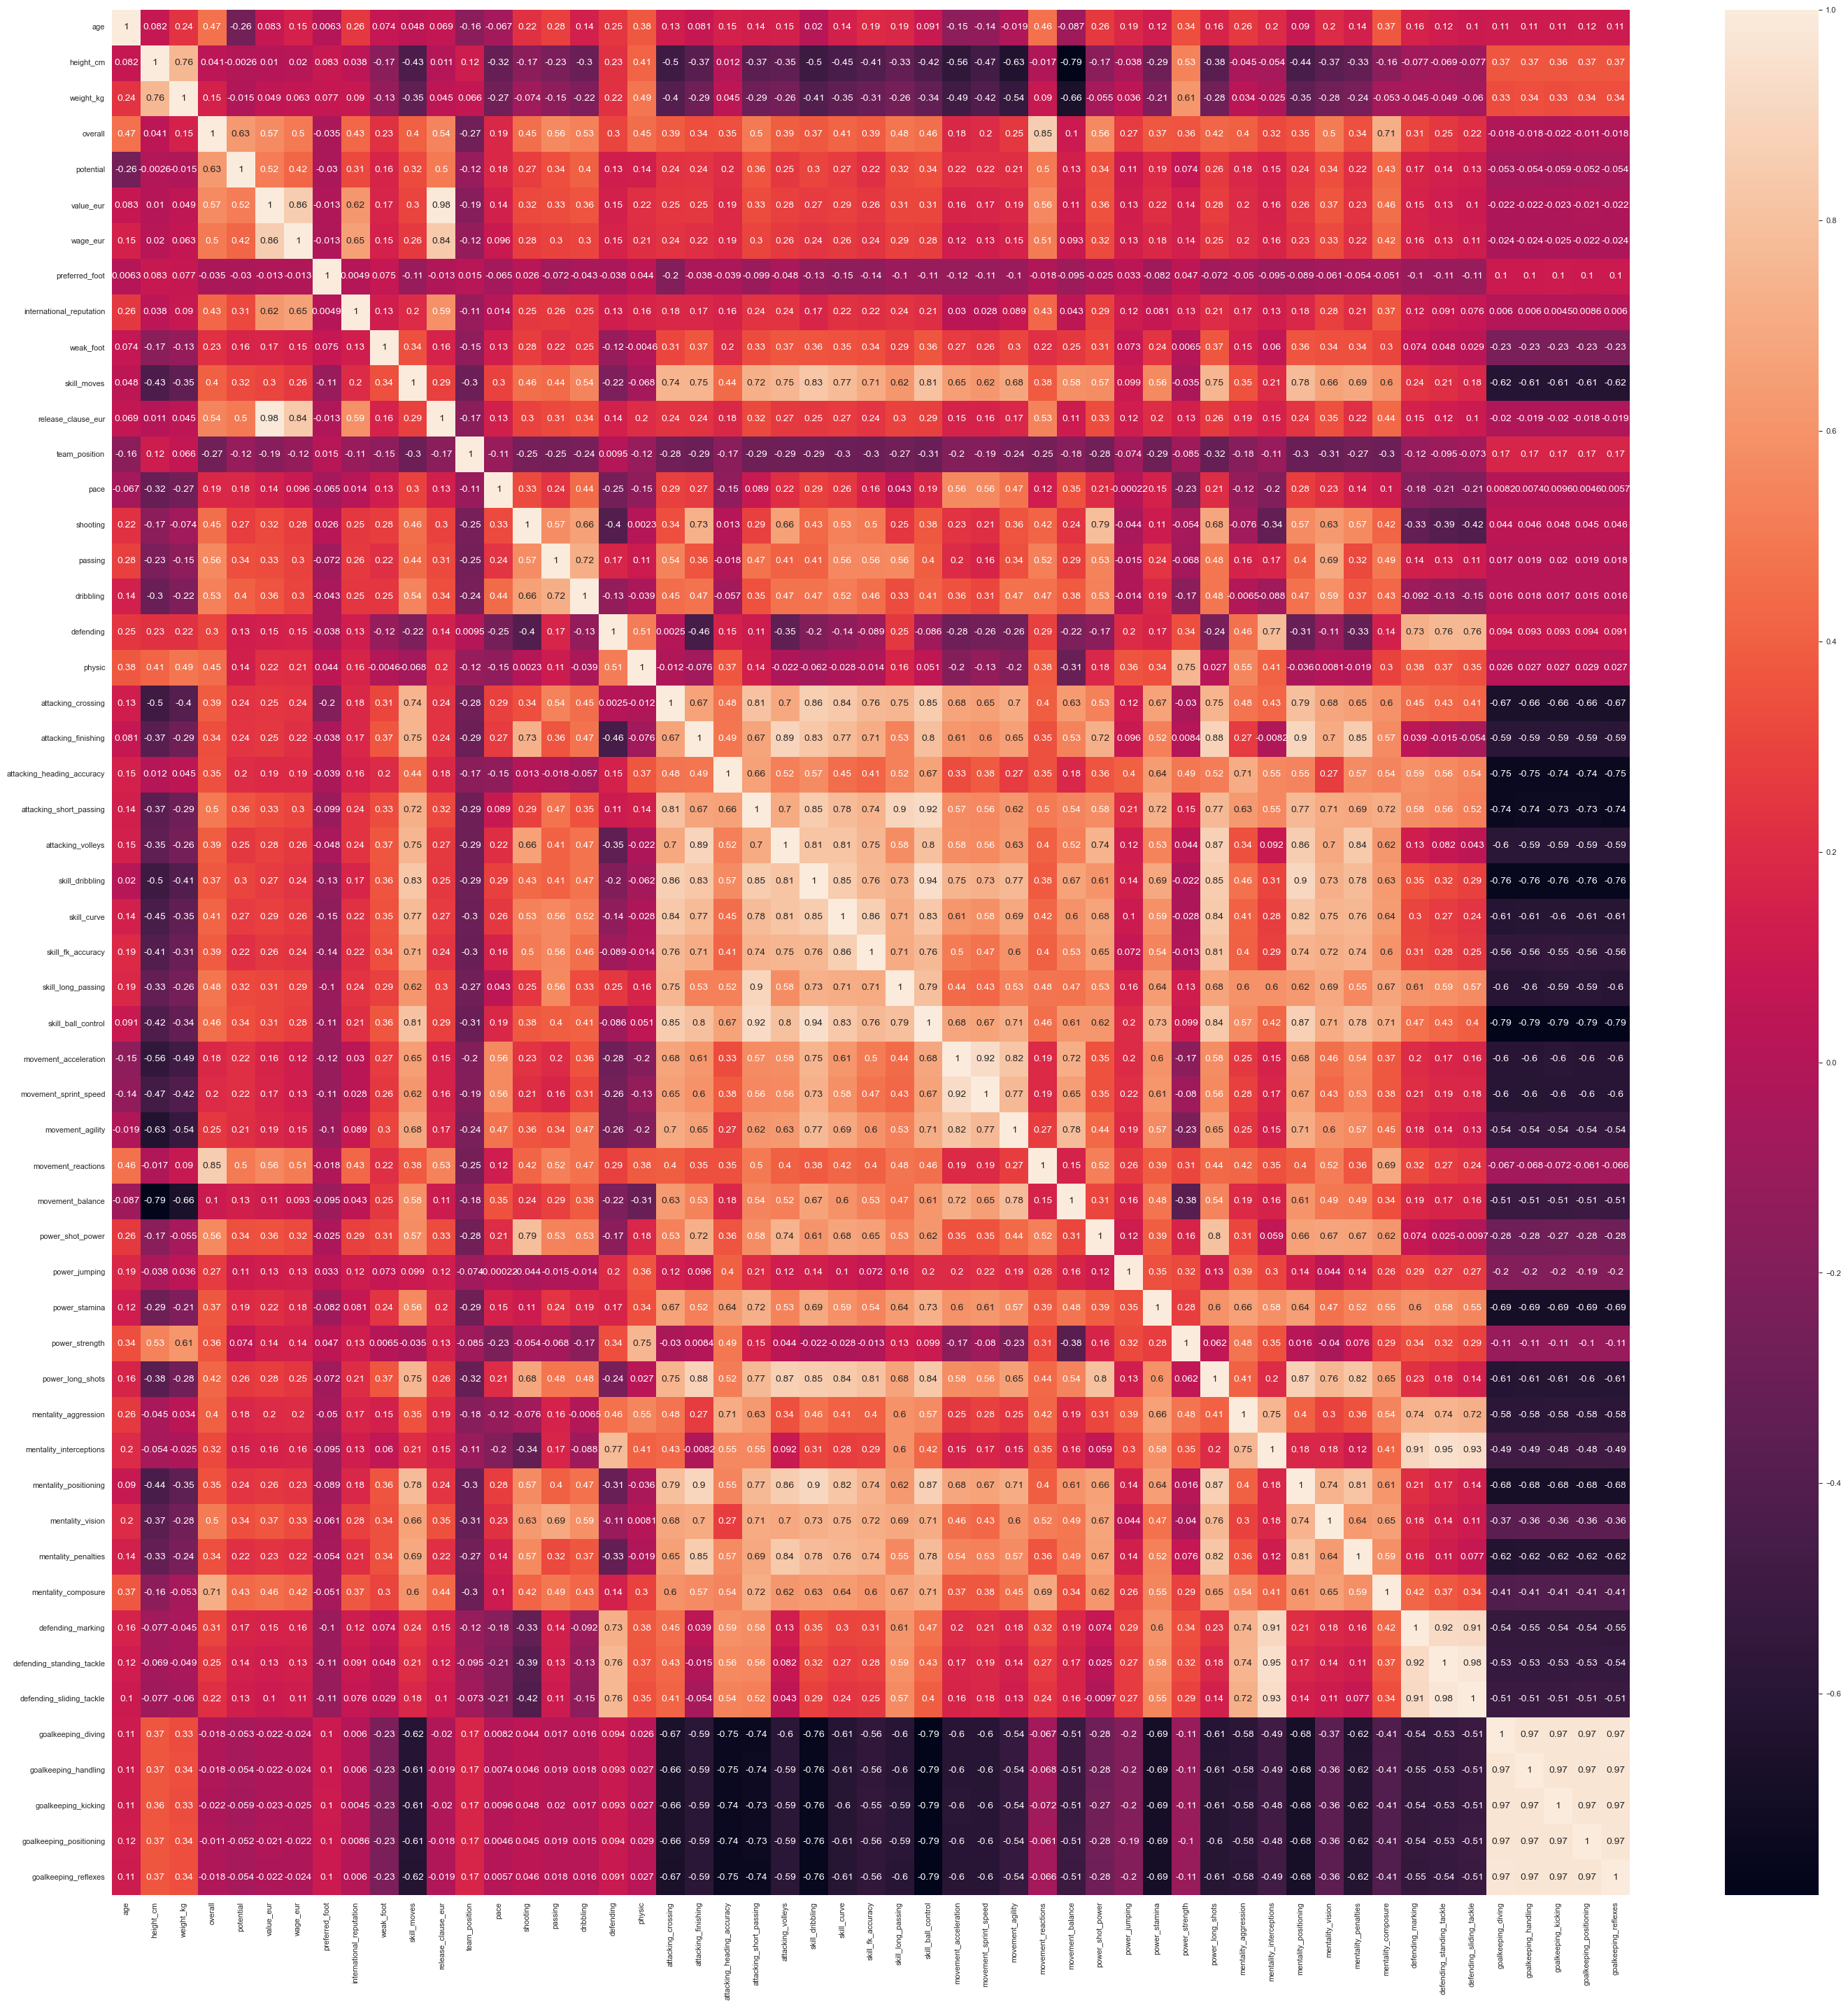

In [135]:
#checking heatmap for correlated values
plt.figure(figsize=(35,35))
sns.heatmap(data.corr(),annot=True)

From this heatmap we can't see how many values are correlated so we can write python code to check highly correlated values

In [136]:
#python code for checking highly correlated values
pd.set_option('display.max_rows',None)
corr = data.corr()
corrmat = corr.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['column1','column2','corr']
corrmat

,column1,column2,corr
0,value_eur,release_clause_eur,0.979233
1,release_clause_eur,value_eur,0.979233
2,defending_standing_tackle,defending_sliding_tackle,0.975808
3,defending_sliding_tackle,defending_standing_tackle,0.975808
4,goalkeeping_reflexes,goalkeeping_diving,0.973922
5,goalkeeping_diving,goalkeeping_reflexes,0.973922
6,goalkeeping_diving,goalkeeping_handling,0.971330
7,goalkeeping_handling,goalkeeping_diving,0.971330
8,goalkeeping_reflexes,goalkeeping_handling,0.971244
9,goalkeeping_handling,goalkeeping_reflexes,0.971244


From this code we can check the highly correlated values and drop them

In [137]:
# dropping highly correlated values
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)


Thus we have dropped all highly correlated values and now we can do PCA to reduce the columns and proceed further

In [138]:
data.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_kicking
0,L. Messi,0.695652,0.205128,0.414634,0.46782,0.50134,0.905213,1.000000,0,5,...,0.644737,0.741176,0.623377,1.000000,0.453488,1.000000,0.800000,1.000000,0.264368,0.152174
1,Cristiano Ronaldo,0.782609,0.641026,0.682927,0.46782,0.50134,0.554502,0.716814,1,5,...,1.000000,0.858824,0.753247,0.988889,0.627907,0.858824,0.917647,0.988095,0.241379,0.152174
2,Neymar Jr,0.478261,0.333333,0.317073,0.46782,0.50134,1.000000,0.513274,1,5,...,0.552632,0.811765,0.376623,0.888889,0.488372,0.952941,0.976471,0.976190,0.298851,0.152174
3,J. Oblak,0.434783,0.666667,0.780488,0.46782,0.50134,0.734597,0.221239,1,3,...,0.776316,0.341176,0.753247,0.088889,0.290698,0.658824,0.047059,0.666667,0.172414,0.836957
4,E. Hazard,0.521739,0.333333,0.463415,0.46782,0.50134,0.853081,0.831858,1,4,...,0.486842,0.847059,0.558442,0.844444,0.523256,0.941176,0.952941,0.940476,0.218391,0.054348


### PRINCIPLE COMPOUNT ANALYSIS

In [139]:
pca_data=data.select_dtypes(include=['float64','int64'])

In [140]:
pd.reset_option('display.max_rows',None)
pca_data

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_kicking
0,0.695652,0.205128,0.414634,0.46782,0.501340,0.905213,1.000000,0,5,4,...,0.644737,0.741176,0.623377,1.000000,0.453488,1.000000,0.800000,1.000000,0.264368,0.152174
1,0.782609,0.641026,0.682927,0.46782,0.501340,0.554502,0.716814,1,5,4,...,1.000000,0.858824,0.753247,0.988889,0.627907,0.858824,0.917647,0.988095,0.241379,0.152174
2,0.478261,0.333333,0.317073,0.46782,0.501340,1.000000,0.513274,1,5,5,...,0.552632,0.811765,0.376623,0.888889,0.488372,0.952941,0.976471,0.976190,0.298851,0.152174
3,0.434783,0.666667,0.780488,0.46782,0.501340,0.734597,0.221239,1,3,3,...,0.776316,0.341176,0.753247,0.088889,0.290698,0.658824,0.047059,0.666667,0.172414,0.836957
4,0.521739,0.333333,0.463415,0.46782,0.501340,0.853081,0.831858,1,4,4,...,0.486842,0.847059,0.558442,0.844444,0.523256,0.941176,0.952941,0.940476,0.218391,0.054348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0.260870,0.615385,0.585366,0.00000,0.057143,0.000379,0.003540,1,1,3,...,0.671053,0.564706,0.350649,0.133333,0.430233,0.188235,0.376471,0.345238,0.563218,0.130435
18274,0.260870,0.384615,0.268293,0.00000,0.057143,0.000379,0.003540,1,1,2,...,0.697368,0.505882,0.311688,0.177778,0.383721,0.188235,0.352941,0.273810,0.620690,0.141304
18275,0.130435,0.615385,0.487805,0.00000,0.057143,0.000379,0.001770,1,1,2,...,0.539474,0.447059,0.402597,0.244444,0.476744,0.341176,0.341176,0.321429,0.494253,0.097826
18276,0.086957,0.589744,0.463415,0.00000,0.000000,0.000379,0.001770,1,1,2,...,0.552632,0.352941,0.454545,0.266667,0.558140,0.458824,0.341176,0.333333,0.586207,0.130435


In [141]:
pd.set_option('display.max_columns',None)
data.head(2)

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_kicking
0,L. Messi,0.695652,0.205128,0.414634,0.46782,0.50134,0.905213,1.000000,0,5,4,4,10,0.930233,0.513889,0.511628,0.511628,0.320000,0.511628,0.943182,1.000000,0.738636,0.977011,1.000000,0.988636,1.0,1.000000,0.929412,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,1.000000,0.800000,1.000000,0.264368,0.152174
1,Cristiano Ronaldo,0.782609,0.641026,0.682927,0.46782,0.50134,0.554502,0.716814,1,5,4,5,11,1.000000,0.513889,0.511628,0.511628,0.266667,0.790698,0.897727,0.989247,0.954545,0.965517,0.913978,0.852273,0.8,0.821429,0.905882,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.858824,0.917647,0.988095,0.241379,0.152174


In [142]:
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
movement_acceleration         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_sh

In [143]:
# getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(pca_data)

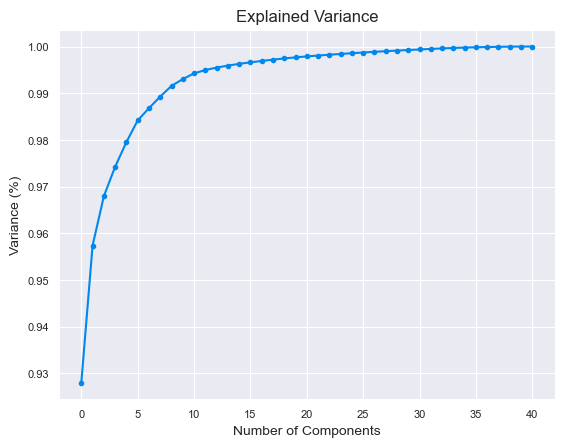

In [144]:
#plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [145]:
pca = PCA(n_components=10) #Object Creation
new_data = pca.fit_transform(pca_data)
# This will be the new data fed to the algorithm.
new_data1 = pd.DataFrame(data = new_data
             , columns = ['principal_component_1', 'principal_component_2','principal_component_3','principal_component_4','principal_component_5',
                         'principal_component_6','principal_component_7','principal_component_8',
                         'principal_component_9','principal_component_10'])

In [146]:
new_data1

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10
0,15.451199,1.969907,-0.129928,1.397554,0.396722,2.520054,1.704348,-0.239963,1.660432,-0.025986
1,14.489104,2.538802,-0.096936,1.600616,1.398421,1.920979,1.722299,0.647767,1.465110,-0.211469
2,8.518769,3.364938,-0.938471,1.111701,1.223587,2.085850,2.057037,0.251658,1.453759,0.301612
3,-1.794504,-1.347939,-0.818893,1.014840,0.754727,1.599020,0.806496,-0.199427,0.303998,-0.249061
4,14.435922,1.787083,-0.372160,0.895403,1.040054,1.555998,1.261503,-0.102728,1.293665,0.109931
...,...,...,...,...,...,...,...,...,...,...
18273,-2.773445,-0.720510,-0.356325,-0.379767,-0.018235,-0.319098,0.551613,0.222331,0.083737,0.349140
18274,-3.785004,-0.939404,0.589626,-0.454013,0.159213,-0.345676,0.602873,-0.074229,0.103892,0.428661
18275,-3.780749,-0.883925,0.592430,-0.315204,0.175577,-0.423568,0.345970,0.143824,0.434374,0.430457
18276,-3.776448,-0.824863,0.614525,-0.309300,0.168589,-0.410073,0.333069,0.045090,0.371645,0.409138


We have done PCA and convert the 40 columns into 10 columns for better performance

### Data Analysis 

***Data Exploration:***

    Univariate Analysis: This involves examining the distribution of each individual column, which includes generating histograms  and kernel density estimations (KDE) to assess normality. It also helps in identifying skewness and understanding the overall distribution of data in each column. Additionally, we can determine the minimum and maximum data values in each column.

    Bivariate Analysis: This type of analysis focuses on the relationship between two columns. We use techniques such as line plots and scatter plots to visualize how data points are distributed in relation to each other. Furthermore, it allows for the exploration of how two columns might be related to an output variable. We applied this approach to investigate topics such as the highest-paid actors, top player-producing countries, and the age at which players retire.

***Data Preprocessing:***

    Handling Missing Data: We addressed missing values by replacing them with the median for numerical columns and the mode for categorical columns.

***Outlier Treatment:*** 
    
    For important columns, we dealt with outliers by replacing them with the median value. This ensures that extreme data points do not unduly influence the analysis. We also transformed non-normally distributed values to be more normally distributed using the mean value.

***Data Normalization:*** 
    
    Following outlier handling, we normalized categorical values to ensure uniformity in the data.

***Data Scaling:*** 
    
    To address the variance in the dataset, we scaled the data to a range of 0 to 1, facilitating consistent comparisons between features.

***Feature Engineering:***

    Column Selection: We eliminated unnecessary columns, especially those with high null values, to simplify the dataset.

***Correlation Analysis:*** 
    
    We examined the correlation between columns and removed highly correlated columns. This helps in avoiding multicollinearity, which can affect model performance.

***Dimensionality Reduction:*** 
    
    Given the large number of columns, we employed Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. This resulted in a more efficient model with a reduced number of columns, going from 40 to 10 columns.

    Having completed the data analysis and preprocessing, we proceeded to the model creation stage and further steps in the project.

### MODEL CREATION

In [147]:
#splitting X
X=new_data1
new_data1

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10
0,15.451199,1.969907,-0.129928,1.397554,0.396722,2.520054,1.704348,-0.239963,1.660432,-0.025986
1,14.489104,2.538802,-0.096936,1.600616,1.398421,1.920979,1.722299,0.647767,1.465110,-0.211469
2,8.518769,3.364938,-0.938471,1.111701,1.223587,2.085850,2.057037,0.251658,1.453759,0.301612
3,-1.794504,-1.347939,-0.818893,1.014840,0.754727,1.599020,0.806496,-0.199427,0.303998,-0.249061
4,14.435922,1.787083,-0.372160,0.895403,1.040054,1.555998,1.261503,-0.102728,1.293665,0.109931
...,...,...,...,...,...,...,...,...,...,...
18273,-2.773445,-0.720510,-0.356325,-0.379767,-0.018235,-0.319098,0.551613,0.222331,0.083737,0.349140
18274,-3.785004,-0.939404,0.589626,-0.454013,0.159213,-0.345676,0.602873,-0.074229,0.103892,0.428661
18275,-3.780749,-0.883925,0.592430,-0.315204,0.175577,-0.423568,0.345970,0.143824,0.434374,0.430457
18276,-3.776448,-0.824863,0.614525,-0.309300,0.168589,-0.410073,0.333069,0.045090,0.371645,0.409138


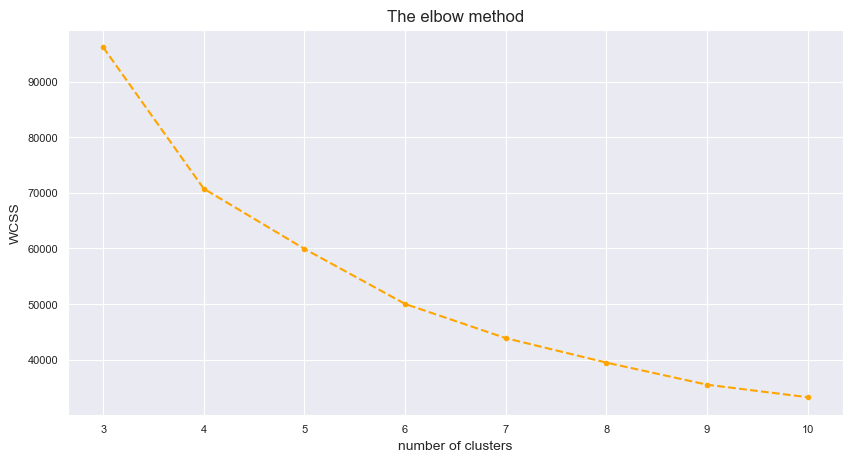

In [148]:
#determining optimal value of K using elbow method
from sklearn.cluster import KMeans
wcss=[]

for i in range(3,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(3,11),wcss,ls='--',marker='o',color='orange')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

We have got 4 as the optimal value for clustering now we import the model and make predictions

In [149]:
#import the model
model=KMeans(n_clusters=4,random_state=42)

In [150]:
#train the model
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [151]:
X.shape

(18278, 10)

In [152]:
#cluster centroids
model.cluster_centers_

array([[ 1.11469046e+00, -6.66729097e-02,  5.73821773e-02,
         3.27506556e-01, -1.33026218e-01, -1.46533028e-01,
         5.45025863e-03,  3.64668163e-02,  1.58515699e-02,
        -6.56647257e-02],
       [ 1.49370521e+01, -2.62448193e-01, -3.82929108e-02,
        -8.66172276e-02,  5.35027677e-02,  3.56433243e-02,
         2.82904349e-03,  7.19941856e-02,  9.06177576e-02,
        -2.98379081e-02],
       [-3.35447793e+00, -2.78111332e-02, -1.26038633e-02,
        -6.40084409e-02,  2.10790414e-02,  3.34916251e-02,
         1.31215320e-03, -6.81606779e-04,  2.40850241e-03,
         6.86355121e-03],
       [ 6.94153742e+00,  3.53905467e-01,  1.24535060e-02,
        -3.73670904e-02,  2.92256717e-02, -5.08919442e-03,
        -1.43846402e-02, -7.87086924e-02, -7.88172013e-02,
         6.14412131e-02]])

In [153]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['green','yellow','pink','cyan'])

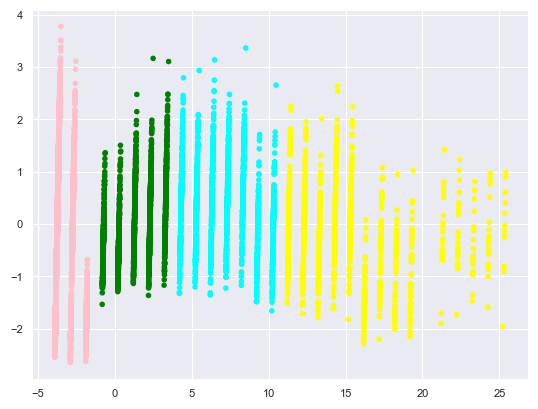

In [154]:
# Visualize the clusters in the original data(Not required in main impelemntation)
plt.scatter(new_data1.principal_component_1,new_data1.principal_component_2,color=color_scheme[model.labels_])

### MODEL EVALUATION

In [155]:
model.labels_
labels=model.labels_

In [156]:
from sklearn.metrics import silhouette_score
scores=silhouette_score(X,labels)
print('silhouette score is:',scores)

silhouette score is: 0.5092229377183871


A silhouette score of 0.5092 suggests that the model has performed relatively well in clustering the data points.

***Conclusion***:

Silhouette score is use to  check wheather the model has corrrectly seperated clusters or not.

It ranges from -1 to 1

A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the object is better matched to a neighboring cluster than its own.
In your case, a Silhouette Score of 0.5092 indicates relatively well-defined clusters with objects in each cluster being more similar to their own cluster than to neighboring clusters. This suggests that the clustering performed by k-means is meaningful and has produced distinct clusters in your data.

In [157]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN object with specified epsilon and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
dbscan.fit(new_data1)

# Access cluster labels and noise points
labels1 = dbscan.labels_

In [158]:
labels1

array([ -1,  -1,  -1, ..., 107, 107,  31], dtype=int64)

In [159]:
scores_db=silhouette_score(X,labels1)

In [160]:
print('silhouette score is:',scores_db)

silhouette score is: 0.23971286486840618


***Conclusion:***

From DBscan we have got silhouette score of 0.239 which means that model has clustterd data points moderately.

In your case, a Silhouette Score of 0.239 indicates that the objects in your clusters have a moderate degree of separation and cohesion. This suggests that the clusters are relatively well-defined, but there might still be some overlap or ambiguity in the assignments. Overall, a score of 0.239 is promising and indicates reasonable clustering quality.

In [161]:
from tabulate import tabulate

# Example data
data = [
    ("Silhouette Score", 0.509,0.239)
]

headers = ["Clusters ", "K- Means", "DBSCAN"]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+------------------+------------+----------+
| Clusters         |   K- Means |   DBSCAN |
+==================+============+==========+
| Silhouette Score |      0.509 |    0.239 |
+------------------+------------+----------+


### Conclusion

From the above different models we have got different silhouette score, we can write the conclusions

- K-Means Clustering: The K-Means clustering method with 4 clusters achieved a Silhouette Score of approximately 0.509. This indicates a relatively good separation and compactness of data points within clusters. The higher the Silhouette Score, the better the clustering quality.

- DBSCAN Clustering: The DBSCAN clustering method achieved a Silhouette Score of approximately 0.239. While this score is close to that of K-Means, it's important to note that DBSCAN does not require specifying the number of clusters beforehand. It identifies dense regions of data points as clusters and can handle irregularly shaped clusters.

### Model Comparison Report

Based on the silhouette scores we can see that k-means performs good compare to the dbscan. in k-means we have got score of 0.539 but in dbscan we have got score of 0.239.

### Challenges Faced

Data Visualization:

Managing a dataset with a substantial number of columns can pose challenges in data visualization as it becomes arduous to effectively compare pairs of columns among the multitude of variables.

Feature Engineering:

When dealing with a high number of features, identifying highly correlated values can be problematic due to the limited visibility and interpretability of the heatmap.

Dimensionality Reduction:

In the context of clustering, determining the importance of individual features for each column becomes challenging.